In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['font.size'] = 12

In [2]:
# read csv files
file_dir = '../csv_files/'
train_set = 'dips'
test_set = 'db5_test'
model = 'model_0'
num_samples = 40
num_steps = 200

df_list = []
for i in range(3):
    file_name = f'{test_set}_{model}_{num_samples}_samples_{num_steps}_steps_{train_set}_{i}'
    df = pd.read_csv(f'{file_dir}{file_name}.csv')
    df_list.append(df)

df = pd.concat(df_list)


In [3]:
def capri_criteria(df):
    fnat = df.fnat
    i_rmsd = df.i_rmsd
    l_rmsd = df.l_rmsd
    if fnat >= 0.5 and (l_rmsd <= 1.0 or i_rmsd <= 1.0):
        return "high"
    elif fnat >= 0.3 and (l_rmsd <= 5.0 or i_rmsd <= 2.0):
        return "medium"
    elif fnat >= 0.1 and (l_rmsd <= 10.0 or i_rmsd <= 4.0):
        return "acceptable"
    else:
        return "incorrect"

In [4]:
df['capri'] = df.apply(capri_criteria, axis=1)

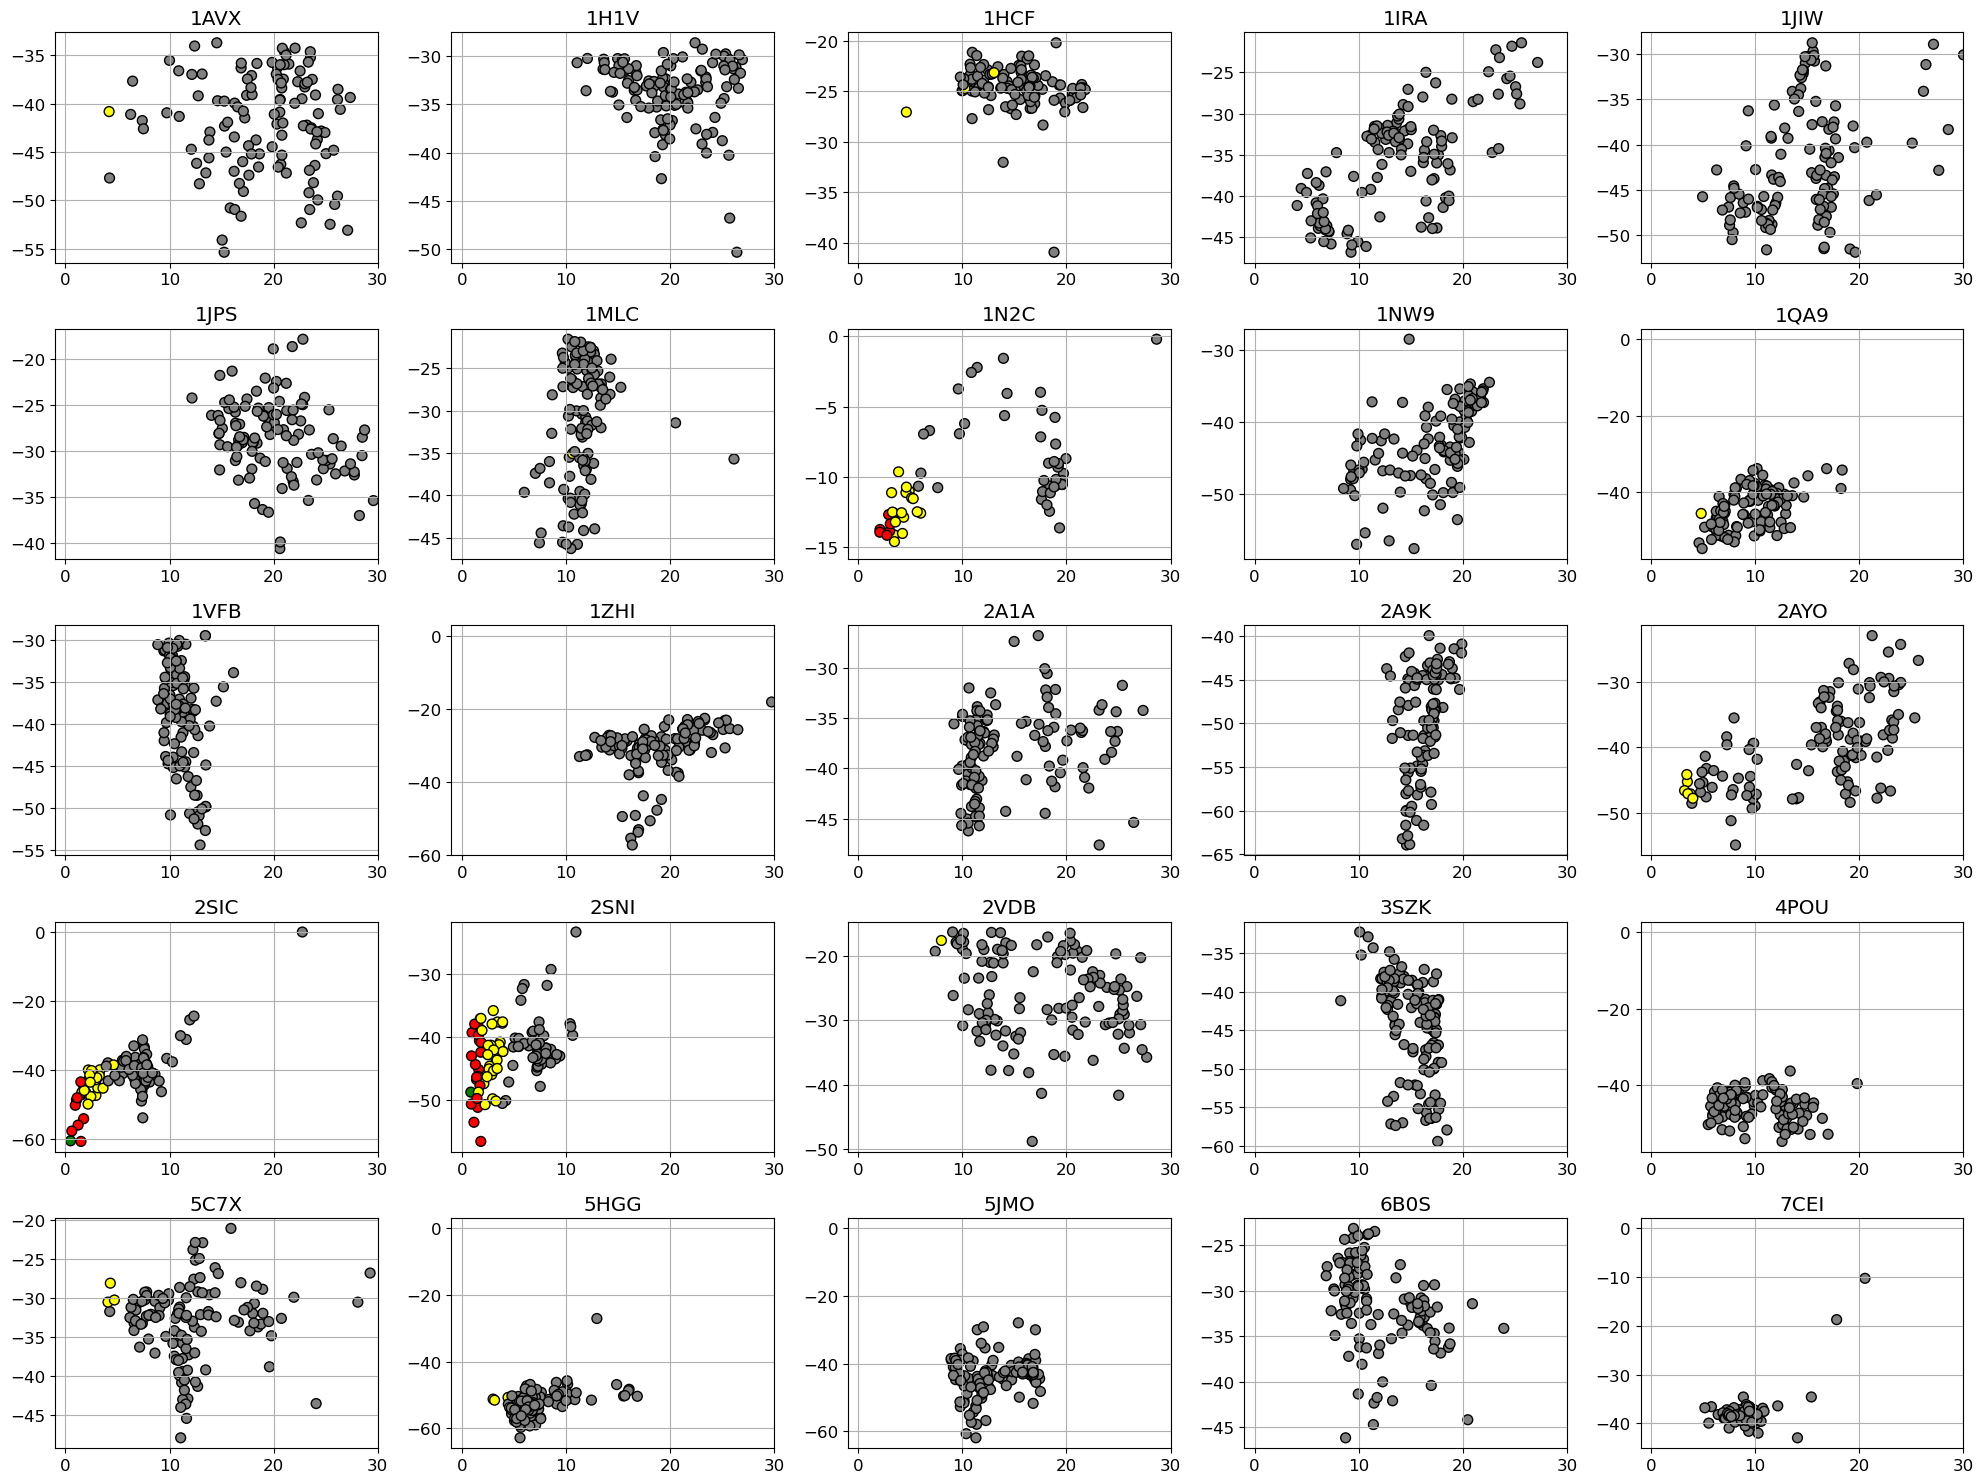

In [5]:
# Get unique values of column A
unique_values_A = df['id'].unique()[:25]

# Create a 5x5 scatter plot grid
fig, axes = plt.subplots(5, 5, figsize=(20, 15))

# Create a new column with categorical values based on the ranges
df['quality'] = pd.cut(df['DockQ'], bins=[0, 0.23, 0.49, 0.80, 1], labels=['incorrect', 'acceptable', 'medium', 'high'])

# Specify colors for each category in the hue variable
hue_colors = {"incorrect": "gray", "acceptable": "yellow", "medium": "red", "high": "green"}

# Iterate through each unique value of A and create scatter plots
for i, value in enumerate(unique_values_A):
    ax = axes.flatten()[i]  # Get the current axis
    subset_df = df[df['id'] == value]  # Filter the DataFrame by the current value of A
    sns.scatterplot(data=subset_df, x='i_rmsd', y='energy', ax=ax, hue='quality', palette=hue_colors, legend=False, edgecolor='black', linewidth=1, s=50)  # Create scatter plot
    ax.set_title(f'{value[:4]}')  # Set title
    ax.set_xlim(-1, 30)
    ax.grid(True)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide empty subplots
for ax in axes.flatten()[len(unique_values_A):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

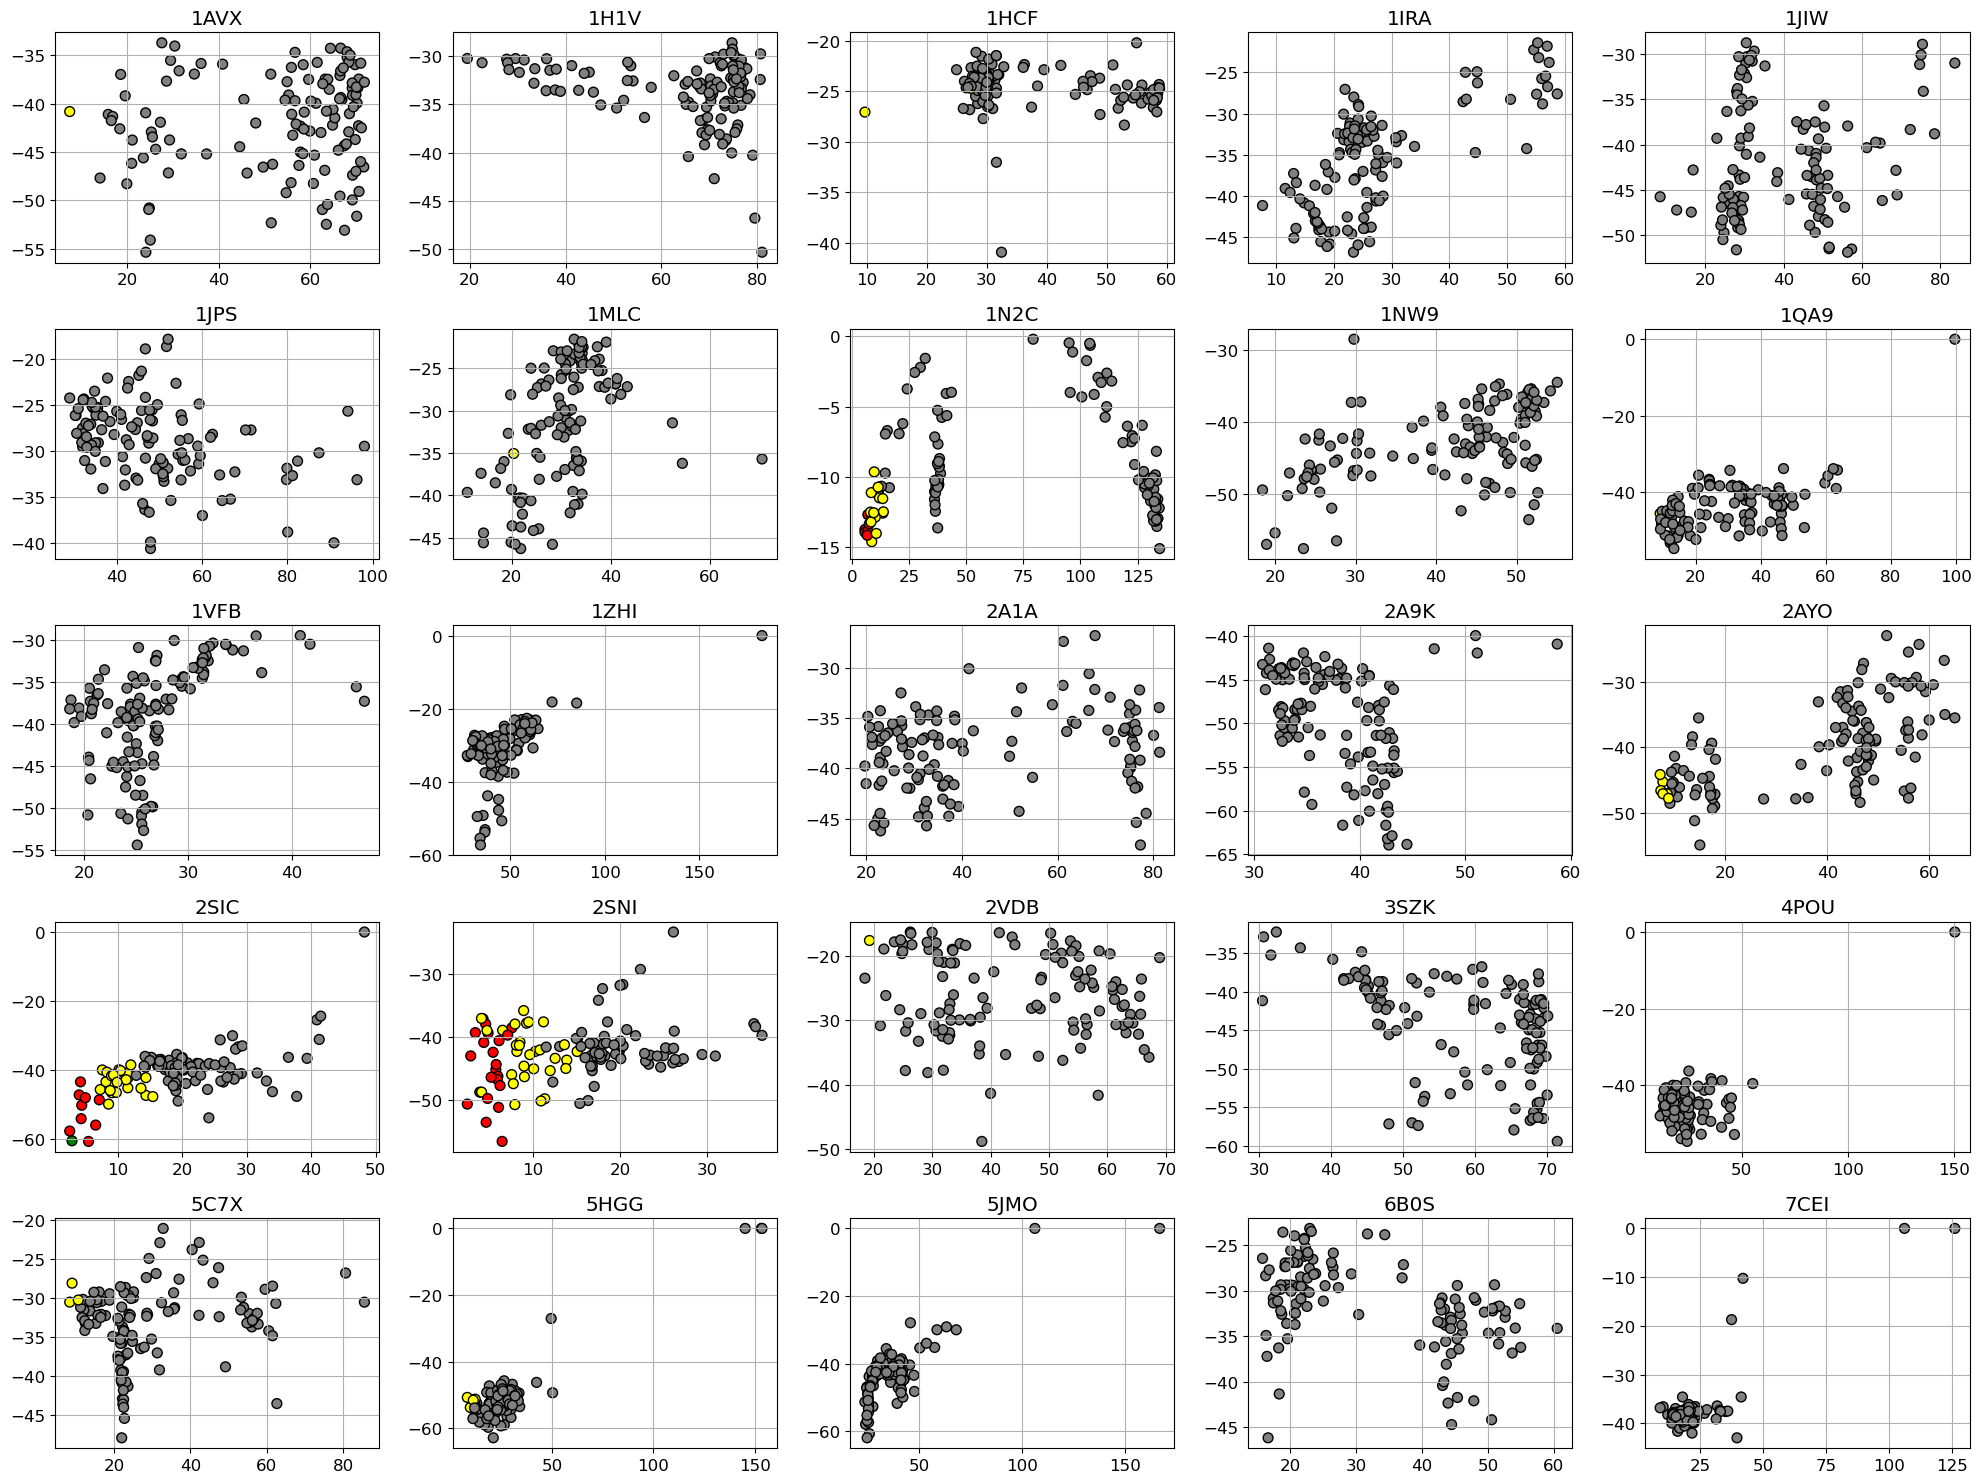

In [6]:
# Get unique values of column A
unique_values_A = df['id'].unique()[:25]

# Create a 5x5 scatter plot grid
fig, axes = plt.subplots(5, 5, figsize=(20, 15))

# Create a new column with categorical values based on the ranges
df['quality'] = pd.cut(df['DockQ'], bins=[0, 0.23, 0.49, 0.80, 1], labels=['incorrect', 'acceptable', 'medium', 'high'])

# Specify colors for each category in the hue variable
hue_colors = {"incorrect": "gray", "acceptable": "yellow", "medium": "red", "high": "green"}

# Iterate through each unique value of A and create scatter plots
for i, value in enumerate(unique_values_A):
    ax = axes.flatten()[i]  # Get the current axis
    subset_df = df[df['id'] == value]  # Filter the DataFrame by the current value of A
    sns.scatterplot(data=subset_df, x='l_rmsd', y='energy', ax=ax, hue='quality', palette=hue_colors, legend=False, edgecolor='black', linewidth=1, s=50)  # Create scatter plot
    ax.set_title(f'{value[:4]}')  # Set title
    #ax.set_xlim(-1, 30)
    ax.grid(True)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide empty subplots
for ax in axes.flatten()[len(unique_values_A):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

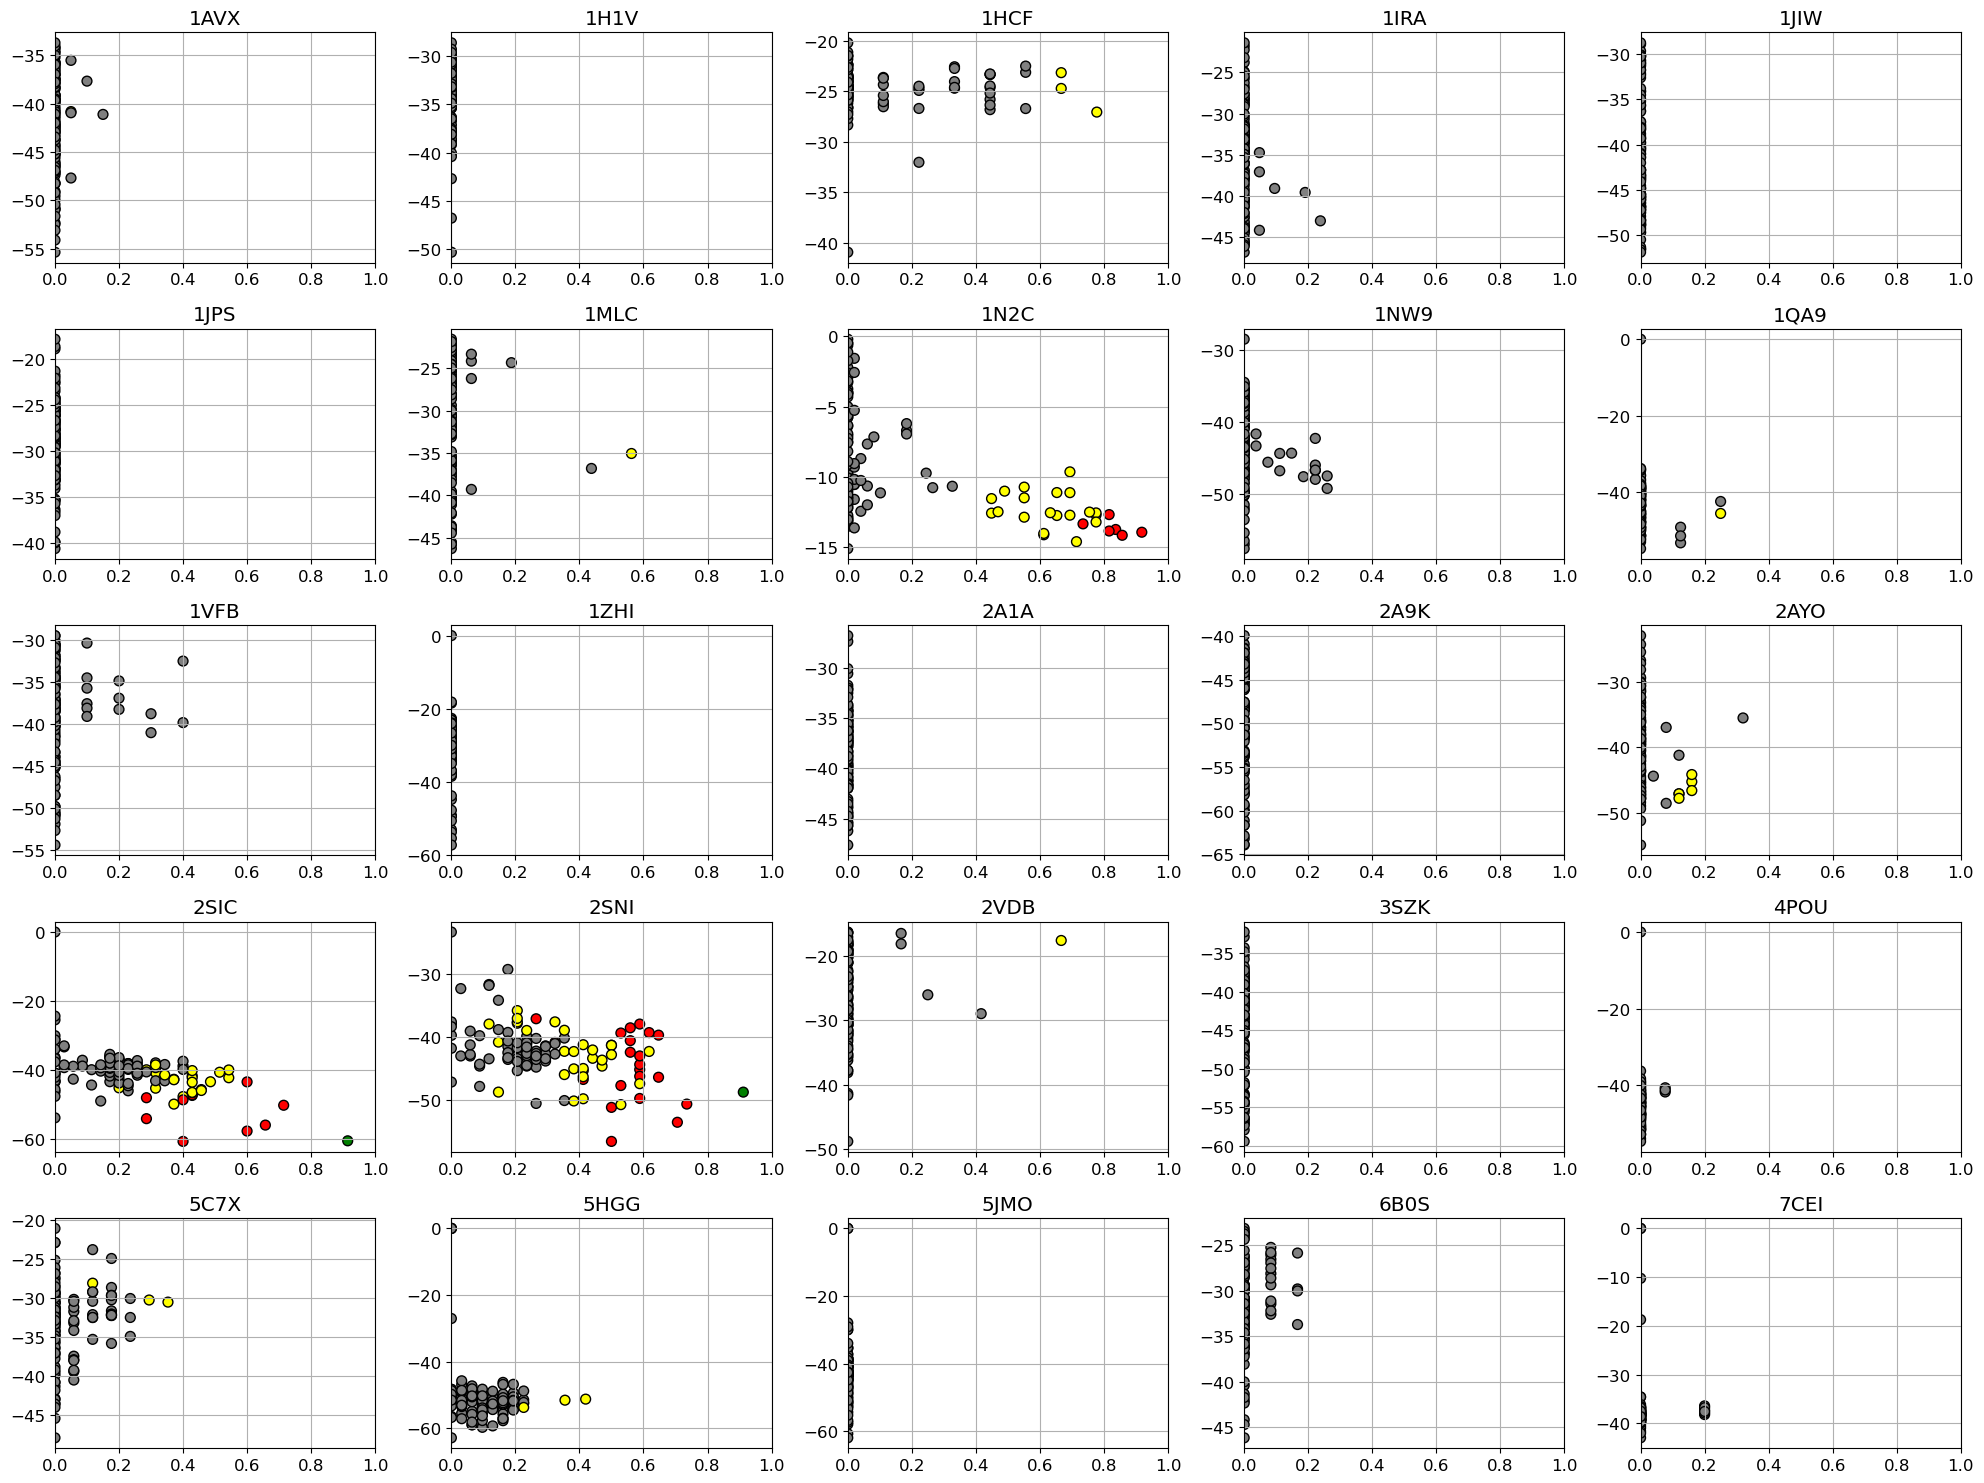

In [7]:
# Get unique values of column A
unique_values_A = df['id'].unique()[:25]

# Create a 5x5 scatter plot grid
fig, axes = plt.subplots(5, 5, figsize=(20, 15))

# Create a new column with categorical values based on the ranges
df['quality'] = pd.cut(df['DockQ'], bins=[0, 0.23, 0.49, 0.80, 1], labels=['incorrect', 'acceptable', 'medium', 'high'])

# Specify colors for each category in the hue variable
hue_colors = {"incorrect": "gray", "acceptable": "yellow", "medium": "red", "high": "green"}

# Iterate through each unique value of A and create scatter plots
for i, value in enumerate(unique_values_A):
    ax = axes.flatten()[i]  # Get the current axis
    subset_df = df[df['id'] == value]  # Filter the DataFrame by the current value of A
    sns.scatterplot(data=subset_df, x='fnat', y='energy', ax=ax, hue='quality', palette=hue_colors, legend=False, edgecolor='black', linewidth=1, s=50)  # Create scatter plot
    ax.set_title(f'{value[:4]}')  # Set title
    ax.set_xlim(0, 1)
    ax.grid(True)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide empty subplots
for ax in axes.flatten()[len(unique_values_A):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

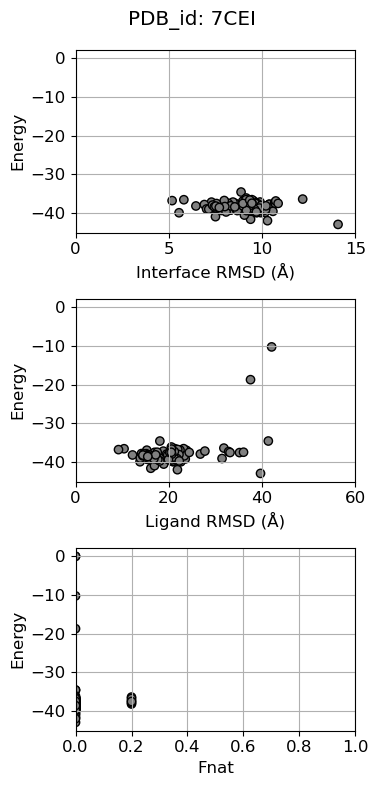

In [8]:
# Get unique values of column A
#value = '2SIC' 

# Create a new column with categorical values based on the ranges
#df['quality'] = pd.cut(df['DockQ'], bins=[0, 0.23, 0.49, 0.80, 1], labels=['incorrect', 'acceptable', 'medium', 'high'])

subset_df = df[df['id'] == value]  # Filter the DataFrame by the current value of A

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(4, 8))


sns.scatterplot(data=subset_df, x='i_rmsd', y='energy', hue='quality', legend=False, edgecolor='black', linewidth=1, palette=hue_colors, ax=axes[0])  # Create scatter plot
sns.scatterplot(data=subset_df, x='l_rmsd', y='energy', hue='quality', legend=False, edgecolor='black', linewidth=1, palette=hue_colors, ax=axes[1])  # Create scatter plot
sns.scatterplot(data=subset_df, x='fnat', y='energy', hue='quality', legend=False, edgecolor='black', linewidth=1, palette=hue_colors, ax=axes[2])  # Create scatter plot


axes[0].grid(True)
axes[0].set_xlabel('Interface RMSD (Å)')
axes[0].set_ylabel('Energy')
axes[0].set_xlim(0, 15)
#axes[0].set_ylim(-16, 0)

axes[1].grid(True)
axes[1].set_xlabel('Ligand RMSD (Å)')
axes[1].set_ylabel('Energy')
axes[1].set_xlim(0, 60)
#axes[1].set_ylim(-62, -20)

axes[2].grid(True)
axes[2].set_xlabel('Fnat')
axes[2].set_ylabel('Energy')
axes[2].set_xlim(0, 1)
#axes[2].set_ylim(-62, -20)

fig.suptitle(f'PDB_id: {value}')
plt.tight_layout()
plt.show()

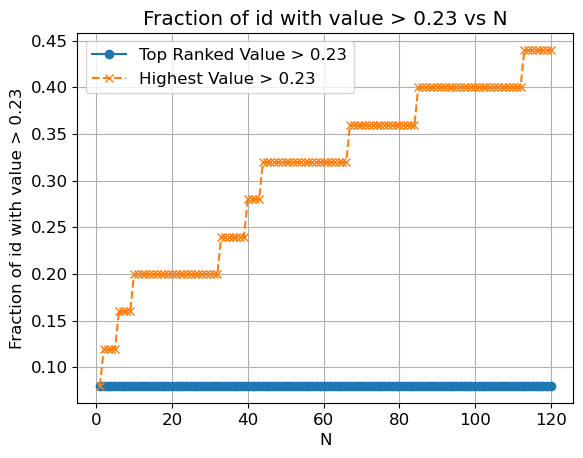

In [9]:
result_df = df.sort_values(by='energy', ascending=True)

# Prepare to store results
max_N = result_df.groupby('id').size().max()  # maximum N to consider
fraction_top_ranked = []
fraction_highest_value = []

# Loop over possible N values
for N in range(1, max_N + 1):
    count_top_ranked = 0
    count_highest_value = 0
    total_ids = result_df['id'].nunique()

    # Group by id
    for _, group in result_df.groupby('id'):
        top_n = group.head(N)
        top_ranked_value = top_n.iloc[0]['DockQ']  # top-ranked value (smallest score)
        highest_value = top_n['DockQ'].max()  # highest value among top N
        
        # Top ranked value > 0.23
        if top_ranked_value > 0.23:
            count_top_ranked += 1
        
        # Highest value > 0.23
        if highest_value > 0.23:
            count_highest_value += 1

    fraction_top_ranked.append(count_top_ranked / total_ids)
    fraction_highest_value.append(count_highest_value / total_ids)

# Plot the results
plt.plot(range(1, max_N + 1), fraction_top_ranked, marker='o', label='Top Ranked Value > 0.23')
plt.plot(range(1, max_N + 1), fraction_highest_value, marker='x', linestyle='--', label='Highest Value > 0.23')
plt.xlabel('N')
plt.ylabel('Fraction of id with value > 0.23')
plt.title('Fraction of id with value > 0.23 vs N')
plt.legend(loc='best')
plt.grid(True)
plt.show()

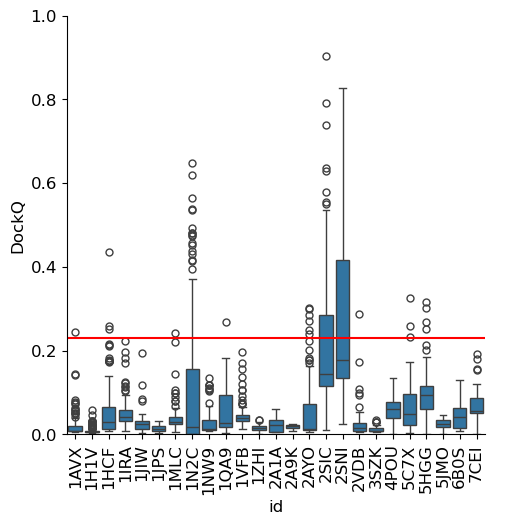

In [10]:
sns.catplot(data=df, x='id', y='DockQ', kind='box')
plt.xticks(rotation=90)
plt.axhline(y = 0.23, color='r')
plt.ylim(0, 1)
plt.show()